

# A Consultancy Job for JC Penney



## Structure
You may structure the project how you wish, but here is a suggested guideline to help you organise your work:

 1. Data Exploration - Explore the data and show you understand its structure and relations
 2. Data Validation - Check the quality of the data. Is it complete? Are there obvious errors?
 3. Data Visualisation - Gain an overall understanding of the data with visualisations
 4. Data Analysis = Set some questions and use the data to answer them
 5. Data Augmentation - Add new data from another source to bring new insights to the data you already have

## 1. Data Exploration

Data exploration was carried out to understan the dataset, including its structure, content, and overall characteristics. And also to insights into the types of variables, their data types, and the relationships between them. Then, it proceeds to load the CSV and JSON files into DataFrames using pandas' read_csv() and JSON decoding methods.


* The required libraries to be used for this consultancy analysis are imported below.

In [1]:
# We import our libraries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from textblob import TextBlob

In [2]:
#Data Exploration showing the structures and relations of the data
# Load the CSV files into dataframes
products_df = pd.read_csv('products.csv')
reviews_df = pd.read_csv('reviews.csv')
users_df = pd.read_csv('users.csv')

# Displaying basic information about the structure of the Products data
print("Products Data:")
print(products_df.head())  # Displays the first few rows of the Products dataframe
print(products_df.info())  # Displays information about the data types and missing values in the Products dataframe
print(products_df.columns)  # Displays the column names of the Products dataframe

# Displaying basic information about the structure of the Reviews data
print("\nReviews Data:")
print(reviews_df.head())  # Displays the first few rows of the Reviews dataframe
print(reviews_df.info())  # Displays information about the data types and missing values in the Reviews dataframe
print(reviews_df.columns)  # Displays the column names of the Reviews dataframe

# Displaying basic information about the structure of the Users data
print("\nUsers Data:")
print(users_df.head())  # Displays the first few rows of the Users dataframe
print(users_df.info())  # Displays information about the data types and missing values in the Users dataframe
print(users_df.columns)  # Displays the column names of the Users dataframe




Products Data:
                            Uniq_id           SKU  \
0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
2  013e320f2f2ec0cf5b3ff5418d688528  pp5006380337   
3  505e6633d81f2cb7400c0cfa0394c427  pp5006380337   
4  d969a8542122e1331e304b09f81a83f6  pp5006380337   

                                          Name  \
0  Alfred Dunner® Essential Pull On Capri Pant   
1  Alfred Dunner® Essential Pull On Capri Pant   
2  Alfred Dunner® Essential Pull On Capri Pant   
3  Alfred Dunner® Essential Pull On Capri Pant   
4  Alfred Dunner® Essential Pull On Capri Pant   

                                         Description  Price  Av_Score  
0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000  
2  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625  
3  Youll return to our Alfred Dunner pull-on capr...  41.09     3.500  
4  Yo

 Conducting a summary statistics for the numerical columns of the datasets


In [3]:
#Summary Statistics
print(products_df.describe())  # Displays summary statistics for numerical columns in the Products dataframe
print("\nReviews Data:")
print(reviews_df.describe())  # Displays summary statistics for numerical columns in the Reviews dataframe

print("\nUsers Data:")
users_df.describe()  # Displays summary statistics for numerical columns in the Users dataframe


              Price     Av_Score
count   5816.000000  7982.000000
mean     144.776618     2.988683
std      499.223719     0.911673
min      -65.270000     1.000000
25%       40.700000     2.500000
50%       58.010000     3.000000
75%       87.020000     3.500000
max    17122.170000     5.000000

Reviews Data:
              Score
count  39063.000000
mean       1.487648
std        1.400332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000

Users Data:


,Username,DOB,State
count,5000,5000,5000
unique,4999,52,57
top,dqft3311,07.08.1953,Massachusetts
freq,2,112,107


### Data Size of the datasets

In [4]:
# Data size
print("Data Size:")
print("Products Dataset Size:", products_df.shape)#Displays the data size in the product data frame
print("Reviews Dataset Size:", reviews_df.shape) #Displays the data size in the review data frame
print("Users Dataset Size:", users_df.shape) #Displays the data size in the user data frame

Data Size:
Products Dataset Size: (7982, 6)
Reviews Dataset Size: (39063, 4)
Users Dataset Size: (5000, 3)


Loading the json file for reviewers and products

In [5]:
json_file_path = "jcpenney_reviewers.json"  # Specify the path to the JSON file

data_list = []  # Initializes an empty list to store JSON objects

# Read the JSON file line by line
with open(json_file_path, "r") as json_file:
    for line_number, line in enumerate(json_file, start=1):
        try:
            # Load each line as a JSON object and append it to the list
            json_data = json.loads(line)
            data_list.append(json_data)
            
            # Display each JSON object in the list
            print(json_data)
            
            if len(data_list) == 3:  # Break out of the loop after the first 3 rows
                break
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON at line {line_number}: {e}")  # Handles JSON decoding errors and print an error message

    
    

    

{'Username': 'bkpn1412', 'DOB': '31.07.1983', 'State': 'Oregon', 'Reviewed': ['cea76118f6a9110a893de2b7654319c0']}
{'Username': 'gqjs4414', 'DOB': '27.07.1998', 'State': 'Massachusetts', 'Reviewed': ['fa04fe6c0dd5189f54fe600838da43d3']}
{'Username': 'eehe1434', 'DOB': '08.08.1950', 'State': 'Idaho', 'Reviewed': []}


In [6]:
json_file_path = "jcpenney_products.json"  # Specifys the path to the JSON file

data_list = [] # Initializes an empty list to store JSON objects

# Read the JSON file line by line
with open(json_file_path, "r") as json_file:
    for line_number, line in enumerate(json_file, start=1):
        try:
            # Load each line as a JSON object and append it to the list
            json_data = json.loads(line)
            data_list.append(json_data)
            
            # Display each JSON object in the list for the first  row
            if len(data_list) <= 1:
                print(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON at line {line_number}: {e}")  # Handles JSON decoding errors and print an error message




{'uniq_id': 'b6c0b6bea69c722939585baeac73c13d', 'sku': 'pp5006380337', 'name_title': 'Alfred Dunner® Essential Pull On Capri Pant', 'description': 'You\'ll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \xa0 elastic waistband approx. 19-21" inseam slash pockets polyester washable imported \xa0 \xa0 \xa0', 'list_price': '41.09', 'sale_price': '24.16', 'category': 'alfred dunner', 'category_tree': 'jcpenney|women|alfred dunner', 'average_product_rating': 2.625, 'product_url': 'http://www.jcpenney.com/alfred-dunner-essential-pull-on-capri-pant/prod.jump?ppId=pp5006380337&catId=cat1002110079&&_dyncharset=UTF-8&urlState=/women/shop-brands/alfred-dunner/yellow/_/N-gkmp33Z132/cat.jump', 'product_image_urls': 'http://s7d9.scene7.com/is/image/JCPenney/DP1228201517142050M.tif?hei=380&amp;wid=380&op_usm=.4,.8,0,0&resmode=sharp2&op_usm=1.5,.8,0,0&resmode=sharp', 'brand': 'Alfred Dunner', 'total_number_reviews': 8, 'Rev

## 1.b Data Integration

Data integration was carried out to combine the information from the (products_df) dataset and the ("jcpenney_products.json") to create a comprehensive and unified view using their common value.

* The common column name for the product_df ('Uniq_id', 'SKU', 'Name', 'Description') and jcpenney_products.json ("'uniq_id', 'sKU','description'") didnot correspound, so we have to rename the column for (product_df) dataset.

In [7]:
# Define a dictionary to map old column names to new column names
column_mapping = {'Uniq_id': 'uniq_id', 'SKU': 'sKU', 'Description': 'description'}

# Use the rename method to replace column names
products_df.rename(columns=column_mapping, inplace=True)

# Now, 'products_df' has updated column names
products_df.head()

,uniq_id,sKU,Name,description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [8]:
# Changing uniqe value for review dataset
# Define a dictionary to map old column names to new column names
column_mapping = {'Uniq_id': 'uniq_id'}

# Use the rename method to replace column names
reviews_df.rename(columns=column_mapping, inplace=True)

# Now, 'products_df' has updated column names
reviews_df.head()

,uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


### Merrging the ('product_df dataset') with the ('product json_file') using their common colum('uniq_id')

In [9]:

json_file = pd.DataFrame(data_list) # Converts the list of JSON objects to a DataFrame

#common key to be merged
common_key = 'uniq_id'

# Merge the JSON DataFrame with the CSV DataFrame based on the common key
merged_data = pd.merge(products_df, json_file, on='uniq_id')

print(merged_data.head())  # Displays the first few rows of the merged data


merged_data.to_csv('merged_data.csv', index=False)  # Writes the merged data to a new CSV file

                            uniq_id           sKU  \
0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
2  013e320f2f2ec0cf5b3ff5418d688528  pp5006380337   
3  505e6633d81f2cb7400c0cfa0394c427  pp5006380337   
4  d969a8542122e1331e304b09f81a83f6  pp5006380337   

                                          Name  \
0  Alfred Dunner® Essential Pull On Capri Pant   
1  Alfred Dunner® Essential Pull On Capri Pant   
2  Alfred Dunner® Essential Pull On Capri Pant   
3  Alfred Dunner® Essential Pull On Capri Pant   
4  Alfred Dunner® Essential Pull On Capri Pant   

                                       description_x  Price  Av_Score  \
0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625   
1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000   
2  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625   
3  Youll return to our Alfred Dunner pull-on capr...  41.09     3.500   
4  Youll return

* Conducting a data exploration for the merged data ('merged_data')

In [10]:
# Displaying basic information about the structure of the 'merged_data'
print(merged_data.head())   # Displays the first few rows of the Products dataframe
print(merged_data.info())   # Displays information about the data types and missing values in the Products dataframe
print(merged_data.columns)   # Displays the column names of the Users dataframe

                            uniq_id           sKU  \
0  b6c0b6bea69c722939585baeac73c13d  pp5006380337   
1  93e5272c51d8cce02597e3ce67b7ad0a  pp5006380337   
2  013e320f2f2ec0cf5b3ff5418d688528  pp5006380337   
3  505e6633d81f2cb7400c0cfa0394c427  pp5006380337   
4  d969a8542122e1331e304b09f81a83f6  pp5006380337   

                                          Name  \
0  Alfred Dunner® Essential Pull On Capri Pant   
1  Alfred Dunner® Essential Pull On Capri Pant   
2  Alfred Dunner® Essential Pull On Capri Pant   
3  Alfred Dunner® Essential Pull On Capri Pant   
4  Alfred Dunner® Essential Pull On Capri Pant   

                                       description_x  Price  Av_Score  \
0  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625   
1  Youll return to our Alfred Dunner pull-on capr...  41.09     3.000   
2  Youll return to our Alfred Dunner pull-on capr...  41.09     2.625   
3  Youll return to our Alfred Dunner pull-on capr...  41.09     3.500   
4  Youll return

## 2. Data Validation

Data validation was carried out to reveal the presence of missing values in the datasets and ensure that the data is accurate and free from errors. In addition, to verify that relationships between variables or columns are consistent and align with expectations.

In [11]:
#Data Validation to check the quality of the data and possiblee Errors
# Checking for missing values in the Products DataFrame
print("\nMissing values in Products Data:")
print(products_df.isnull().sum())  # Displays the sum of missing values for each column in the Products DataFrame

# Checking for missing values in the Reviews DataFrame
print("\nMissing values in Reviews Data:")
print(reviews_df.isnull().sum())  # Displays the sum of missing values for each column in the Reviews DataFrame

# Checking for missing values in the Users DataFrame
print("\nMissing values in Users Data:")
print(users_df.isnull().sum())  # Displays the sum of missing values for each column in the Users DataFrame

# Checking data types consistency in the Products DataFrame
print("\nData types in Products Data:")
print(products_df.dtypes)  # Displays the data types of each column in the Products DataFrame

# Checking data types consistency in the Reviews DataFrame
print("\nData types in Reviews Data:")
print(reviews_df.dtypes)  # Displays the data types of each column in the Reviews DataFrame

# Checking data types consistency in the Users DataFrame
print("\nData types in Users Data:")
print(users_df.dtypes)  # Displays the data types of each column in the Users DataFrame



Missing values in Products Data:
uniq_id           0
sKU              67
Name              0
description     543
Price          2166
Av_Score          0
dtype: int64

Missing values in Reviews Data:
uniq_id     0
Username    0
Score       0
Review      0
dtype: int64

Missing values in Users Data:
Username    0
DOB         0
State       0
dtype: int64

Data types in Products Data:
uniq_id         object
sKU             object
Name            object
description     object
Price          float64
Av_Score       float64
dtype: object

Data types in Reviews Data:
uniq_id     object
Username    object
Score        int64
Review      object
dtype: object

Data types in Users Data:
Username    object
DOB         object
State       object
dtype: object


##### Data Validation for the (merged_data) data

In [12]:
print("\nMissing values in Merged Data:")
print(merged_data.isnull().sum())



Missing values in Merged Data:
uniq_id                      0
sKU                         67
Name                         0
description_x              543
Price                     2166
Av_Score                     0
sku                          0
name_title                   0
description_y                0
list_price                   0
sale_price                   0
category                     0
category_tree                0
average_product_rating       0
product_url                  0
product_image_urls           0
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64


### Fixing the missing values in columns (Price and Description) for ('products_df')


In [13]:
# For price
products_df['Price'].fillna(0, inplace=True)

# For Description
products_df['description'].fillna('No Description', inplace=True)

# For SKU, its best i drop it to have a smooth analysis 
column_to_drop = 'sKU'
products_df.drop(columns=column_to_drop, inplace=True)

print(products_df.isnull().sum())


uniq_id        0
Name           0
description    0
Price          0
Av_Score       0
dtype: int64


 ### Fixing the missing values in columns (Price , Description and sKU ) For the merged data

In [14]:
# For price
merged_data['Price'].fillna(0, inplace=True)

# For Description
merged_data['description_x'].fillna('No Description', inplace=True)

# For SKU, its best i drop it to have a smooth analysis 
column_to_drop = 'sKU'
merged_data.drop(columns=column_to_drop, inplace=True)

print(products_df.isnull().sum())

uniq_id        0
Name           0
description    0
Price          0
Av_Score       0
dtype: int64


### Performing a Sentiment Analysis on Production Description for the Merged Data

For this part, a natural language processing technique (NLP) will be used by extracting sentiment polarity from the descirption text to determine the positive, negative or netural sentiments associted with specific producs.

In [15]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment(description):
    if pd.isna(description):  # Check for NaN values
        return 0  # or any default value based on your preference
    blob = TextBlob(description)
    return blob.sentiment.polarity

# Apply sentiment analysis to the "Description" column
merged_data['Sentiment'] = merged_data['description_x'].apply(analyze_sentiment)

# Creating a new column for sentiment labels (positive, negative, neutral)
merged_data['Sentiment_Label'] = merged_data['Sentiment'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

print(merged_data[['description_x', 'Sentiment', 'Sentiment_Label']])  # Displays the modified DataFrame

                                          description_x     Sentiment  \
0     Youll return to our Alfred Dunner pull-on capr... -5.551115e-17   
1     Youll return to our Alfred Dunner pull-on capr... -5.551115e-17   
2     Youll return to our Alfred Dunner pull-on capr... -5.551115e-17   
3     Youll return to our Alfred Dunner pull-on capr... -5.551115e-17   
4     Youll return to our Alfred Dunner pull-on capr... -5.551115e-17   
...                                                 ...           ...   
7977  This Hoover® vacuum features dual-stage cyclon...  2.194444e-01   
7978  This Hoover® vacuum features dual-stage cyclon...  2.194444e-01   
7979  This Hoover® vacuum features dual-stage cyclon...  2.194444e-01   
7980                                     No Description  0.000000e+00   
7981                                     No Description  0.000000e+00   

     Sentiment_Label  
0           Negative  
1           Negative  
2           Negative  
3           Negative  
4       

# 3. Data Visualization

* Data visualization was constructed to  understand the temporal dynamics of the data, identify trends and patterns.
* The code below utilizes matplotlib.pyplot to create various charts and graphs.

#### Visualization for the merged data

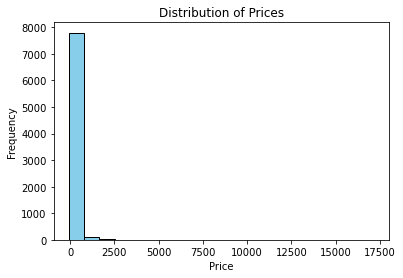

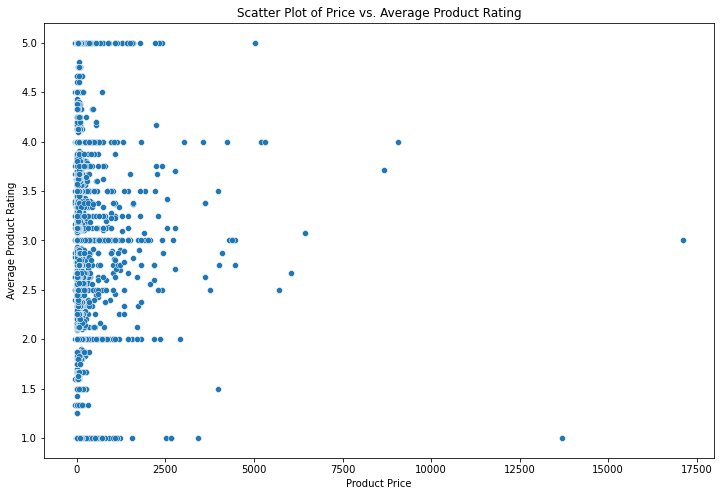

'\nThe x-axis represents the product price.\nThe y-axis represents the average product rating.\nEach point in the scatter plot represents a product.\n'

In [16]:
#Data Visualizatio using the merged  data
# Distribution of Price
plt.hist(merged_data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show() # Displays the plot

# Distribution of Price vs. Average Product Rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y='Av_Score', data=merged_data) # Creates a scatter plot 
# Set labels and title
plt.xlabel('Product Price')
plt.ylabel('Average Product Rating')
plt.title('Scatter Plot of Price vs. Average Product Rating')
plt.show() # Displays the plot

'''
The x-axis represents the product price.
The y-axis represents the average product rating.
Each point in the scatter plot represents a product.
'''


###### Other Visualization using the unmerged datasets

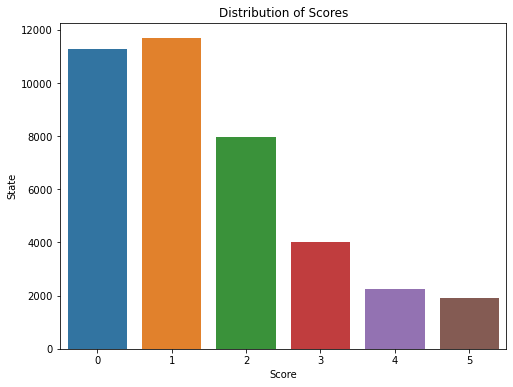

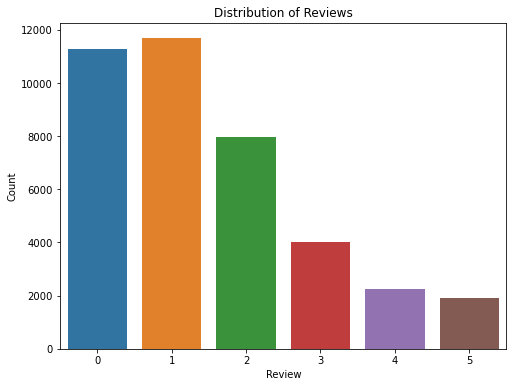

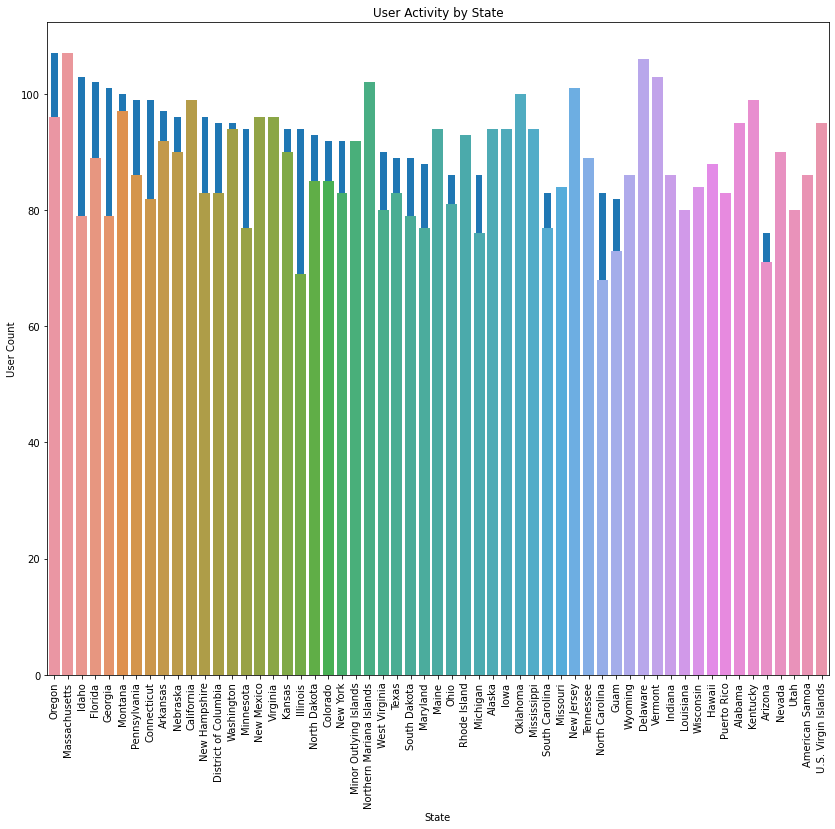

In [17]:
# Data Visualization to gain an overal understanding of the datasets

# Visualize the distribution of score in the reviews data by state
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=reviews_df)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('State')
# the count axis  counts the occurrences of each unique score and visualizes the distribution
plt.show()# Displays the plot

# Visualize the distribution of Review in the reviews data
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=reviews_df)
plt.title('Distribution of Reviews')
plt.xlabel('Review')
plt.ylabel('Count')
# the count axis  counts the occurrences of each unique Reeview and visualizes the distribution
plt.show() # Displays the plot

# User activity by state
plt.figure(figsize=(14, 12))
user_activity_by_location = users_df['State'].value_counts().sort_values(ascending=False)
user_activity_by_location.plot(kind='bar')
sns.countplot(x='State', data=users_df)
plt.title('User Activity by State')
plt.xlabel('State')
plt.ylabel('User Count')
plt.show() # Displays the plot

### 4. Data Analysis

Data analysis was conducted by extracting meaningful insights from data through statistical techniques and computational methods. In the context of this assignment, data analysis aims to answer specific questions and gain deeper understanding of the data. This questions are listed below:

-__Average Review Rating by Product Category__: Identifying the product categories with the highest average review ratings can help JC Penney focus on promoting and improving products in those categories.

-__Top 10 Most Reviewed Products__: Analyzing the most reviewed products can reveal popular items and areas where JC Penney could potentially expand its product offerings.

-__User Influence on Product Reviews__: Understanding the influence of individual users on product reviews can help JC Penney identify influential customers and potentially leverage their opinions for marketing purposes.

-__Top 5 most common states among users__: Analyzing the most state among users

-__How many unique users wrote a review__: Identifying the total number of users that wrote a review.

This analysis was done using the ('merged_data') dataframe.

##### QUESTION 1: What is the average Review Rating by Product? 

In [18]:
# Merge the already merged dataset(merge_data) and reviews data on the common column 'uniq_id'
merged_data2 = pd.merge(reviews_df,merged_data, on='uniq_id', how='inner')
average_rating_by_product = merged_data2.groupby('Name')['Score'].mean().reset_index() # Calculates average review rating by product
print("Average Review Rating by Product:")
print(average_rating_by_product)

Average Review Rating by Product:
                                                   Name     Score
0                1 CT. Certified Diamond Solitaire Ring  2.333333
1     1 CT. T.W. Certified Diamond 14K White Gold Br...  5.000000
2     1 CT. T.W. Certified Diamond 14K White Gold Pr...  1.000000
3     1 CT. T.W. Certified Diamond 14K Yellow Gold B...  1.000000
4        1 CT. T.W. Diamond 10K White Gold Cluster Ring  0.000000
...                                                 ...       ...
5996  ¼ CT. T.W. White & Color-Enhanced Black Diamon...  2.000000
5997    ½ CT. Princess Certified Diamond Solitaire Ring  1.000000
5998  ½ CT. T.W. Diamond 10K Yellow Gold Contoured A...  0.750000
5999                      ½ CT. T.W. Diamond Bridal Set  0.000000
6000            ⅓ CT. T.W. Diamond 3-Stone Promise Ring  1.000000

[6001 rows x 2 columns]


##### QUESTION 2: What is the top 10 Most Reviewed product?

In [19]:
print("\nMost Reviewed Product:")
# Count the number of reviews for each product, then get the top 10 most reviewed products
top_10_most_reviewed = merged_data2['Name'].value_counts().head(10).reset_index()
top_10_most_reviewed.columns = ['Product', 'Review Count']
print("Top 10 Most Reviewed Products:")
print(top_10_most_reviewed)


Most Reviewed Product:
Top 10 Most Reviewed Products:
                                             Product  Review Count
0        Stafford® Gunner Mens Cap Toe Leather Boots           144
1                Clarks® Leisa Grove Leather Sandals           144
2        Xersion™ Quick-Dri Performance Bootcut Pant           104
3   Clarks® Leisa Grove Leather Sandals - Wide Width            81
4  St. Johns Bay® Secretly Slender Straight-Leg J...            80
5              Xersion™ Quick-Dri Performance Capris            80
6                          Arizona Harbor Boat Shoes            67
7       Liz Claiborne® Rockele Stretch Wedge Sandals            65
8  Liz Claiborne® Essential Original-Fit Straight...            64
9             Arizona Raglan-Sleeve Thermal Pullover            60


##### QUESTION 3: What is the User influence on product reviews?


In [20]:
print("\nUser influence on product reviews:")
# Merge reviews and users data on the common column 'Username'
merged_data3 = pd.merge(reviews_df, users_df, on='Username', how='inner')

# Calculate average review score by user
average_score_by_user = merged_data3.groupby('Username')['Score'].mean().reset_index()
average_score_by_user.columns = ['Username', 'Average_Score']

# Calculate total number of reviews by user
total_reviews_by_user = merged_data3['Username'].value_counts().reset_index()
total_reviews_by_user.columns = ['Username', 'Total_Reviews']

# Merge the calculated metrics
user_influence_metrics = pd.merge(average_score_by_user, total_reviews_by_user, on='Username', how='inner')
print(user_influence_metrics.head())


User influence on product reviews:
   Username  Average_Score  Total_Reviews
0  aaez2213       0.900000             10
1  aage1132       1.300000             10
2  aagf4423       0.888889              9
3  aahc4142       1.000000             11
4  aajh3423       1.700000             10


##### QUESTION 4: What is the top 5 most common states among users?


In [21]:
print("\n Top 5 most common states among users:")
# Count the number of users from each state, then get the top 5 most common states
top_states = users_df['State'].value_counts().head(5).reset_index()
top_states.columns = ['State', 'User Count']
print(top_states)



 Top 5 most common states among users:
                      State  User Count
0             Massachusetts         107
1                  Delaware         106
2                   Vermont         103
3  Northern Mariana Islands         102
4                New Jersey         101


##### QUESTION 5: How many unique users wrote a review?

In [22]:
print("\nUnique users that wrote a review:")
# Count the number of unique users who have written reviews
unique_users_count = reviews_df['Username'].nunique()
print("Number of Unique Users who have Written Reviews:", unique_users_count)



Unique users that wrote a review:
Number of Unique Users who have Written Reviews: 4993


## 5. Data Augmentation

For the data augmentaion combining information from different sources to enhance the already merged  dataset (merged_data.csv). In this case, i want to augment my already merged dataset (merged_data.csv) with information from the new CSV file (myntra_products_catalog_2.csv). For the new dataset the folowing process will be carried out:

-__Data Exploration__.
-__Data Validation__.

In [23]:
# First thing is to load the new cvs file
new_data = pd.read_csv('myntra_products_catalog 2.csv')
new_data.head   #Displays the first few rows of the new data
new_data.info() # Displays information about the data types and missing values in the (new_data) dataframe
new_data.columns # Displays the column names of the (new data) dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

##### Summary statistics for the new data

In [24]:
new_data.describe() # Displays summary statistics for numerical columns in the (new_data) dataframe

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


##### Data Validation for the (new data) dataframe

In [25]:
#Checking for missing values
print(new_data.isnull().sum()) # Displays the columns and there missing values

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64


##### Fixing the missing Value for the (new_data) dataframe

In [26]:
# For PrimaryColor, its best i drop it to have a smooth data for analysis as its not a required variable
column_to_drop = 'PrimaryColor'
new_data.drop(columns=column_to_drop, inplace=True)

print(new_data.isnull().sum())

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
dtype: int64


##### Data integration for the (new_data) dataframe

The common column name for the (merged_data.csv) ('uniq_id', 'description', 'Price') and (myntra_products_catalog_2.csv) which is the(new_data) data frame  ('ProductID','Description', 'Price') did not correspound, so we have to rename the column for (myntra_products_catalog_2.csv).

In [27]:
# Define a dictionary to map old column names to new column names
column_mapping = {'ProductID': 'uniq_id', 'Description': 'description_x', 'Price (INR)': 'Price'}

new_data.rename(columns=column_mapping, inplace=True) # Uses the rename method to replace column names

# No the 'products_df' has updated column names
new_data.head(10) #Displays the first 10 rows of the dataset and its columns

,uniq_id,ProductName,ProductBrand,Gender,Price,NumImages,description_x
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec..."
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ..."
5,10014361,SHOWOFF Men Brown Solid Slim Fit Regular Shorts,SHOWOFF,Men,791,5,"Brown solid low-rise regular shorts, has four ..."
6,10017869,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,719,5,"Blue checked casual shirt, has a spread collar..."
7,10009695,SPYKAR Women Burgundy Alexa Super Skinny Fit H...,SPYKAR,Women,899,7,Burgundy coloured wash 5-pocket high-rise jean...
8,10000571,Parx Men Brown Tapered Fit Solid Regular Trousers,Parx,Men,664,5,Brown solid regular trousers regular trousers
9,10017421,DKNY Unisex Black Large Trolley Bag,DKNY,Unisex,17360,5,"Black solid large trolley bag, secured with a ..."


From the above data, it is clearly seen the 'price' Column for (new_data) data frame  is not in a float format or decimal format. A data cleaning will be carried out on the price column.

In [28]:
# Convert the 'Price'column to numeric data type(float) as seen in the (merge_data) and round to 2 decimal places
new_data['Price'] = new_data['Price'].astype(float).round(2)

print(new_data)
new_data['Price'] = new_data['Price'].astype(float).round(2)

new_data.head()

        uniq_id                                        ProductName  \
0      10017413  DKNY Unisex Black & Grey Printed Medium Trolle...   
1      10016283  EthnoVogue Women Beige & Grey Made to Measure ...   
2      10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...   
3      10015921  Raymond Men Blue Self-Design Single-Breasted B...   
4      10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...   
...         ...                                                ...   
12486  10262843  Pepe Jeans Men Black Hammock Slim Fit Low-Rise...   
12487  10261721                 Mochi Women Gold-Toned Solid Heels   
12488  10261607  612 league Girls Navy Blue & White Printed Reg...   
12489  10266621  Bvlgari Men Aqva Pour Homme Marine Eau de Toil...   
12490  10265199  Pepe Jeans Men Black & Grey Striped Polo Colla...   

      ProductBrand  Gender    Price  NumImages  \
0             DKNY  Unisex  11745.0          7   
1       EthnoVogue   Women   5810.0          7   
2        

,uniq_id,ProductName,ProductBrand,Gender,Price,NumImages,description_x
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745.0,7,"Black and grey printed medium trolley bag, sec..."
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810.0,7,Beige & Grey made to measure kurta with churid...
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899.0,7,Pink coloured wash 5-pocket high-rise cropped ...
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599.0,5,Blue self-design bandhgala suitBlue self-desig...
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759.0,5,"Brown and off-white printed casual shirt, has ..."


### Merging the (merged_data) and the (new_data) using their common column name "uniq_id"

In [29]:
#common key to be merged
common_key = 'Price'

# Merge the (merged_data) DataFrame with the (new_data) DataFrame based on the common key
augmented_data = pd.merge(merged_data, new_data, on='Price', how='inner')

augmented_data.head() # Displays the first few rows of the merged data

,uniq_id_x,Name,description_x_x,Price,Av_Score,sku,name_title,description_y,list_price,sale_price,...,Reviews,Bought With,Sentiment,Sentiment_Label,uniq_id_y,ProductName,ProductBrand,Gender,NumImages,description_x_y
0,d18bc79994ff35a2bca40977f81c4bc7,St. Johns Bay® Jamie Womens Suede Slouch Boots,"Our Jamie suede slouch boots are soft, supple ...",223.0,3.800000,pp5006480004,St. John's Bay® Jamie Womens Suede Slouch Boots,"Our Jamie suede slouch boots are soft, supple ...",223.00,66.90,...,"[{'User': 'tpjz4113', 'Review': 'every time I ...","[16064243a2fb997eb77852b200dbf7f9, cb0768924f7...",0.220000,Positive,10248063,U.S. Polo Assn. Men Navy Blue Solid Trunks I64...,U.S. Polo Assn.,Men,4,"Navy blue solid trunks, with an outer elastica..."
1,d2a5ad88091a614e2a45987ad967250f,Samsung 7.5 Cu. Ft. Electric Dryer with Steam Dry,true Skip the dry cleaners with this powerful ...,1063.0,2.454545,pp5006420444,Samsung 7.5 Cu. Ft. Electric Dryer with Steam Dry,true Skip the dry cleaners with this powerful ...,1063.00,956.58,...,"[{'User': 'yaal4342', 'Review': 'After two loa...","[fd5481319128d684c6778910529ee9db, e17fc1a2ad3...",0.224026,Positive,10037175,Shaily Orange Solid Satin Saree,Shaily,Women,5,Design Detail:Orange solid saree and has an ...
2,aae6a185a8dde153e40d8a6ed271998d,GE® ENERGY STAR® 7.8 Cu. ft. Electric Dryer,true Meeting or exceeding federal guidelines f...,1063.0,3.375000,pp5006301041,GE® ENERGY STAR® 7.8 Cu. ft. Electric Dryer,true Meeting or exceeding federal guidelines f...,1063.00,956.58,...,"[{'User': 'obfo3424', 'Review': 'Ive only had ...","[5c9646aa07ba1087640af66d1ea4a528, 102b1adda81...",0.208333,Positive,10037175,Shaily Orange Solid Satin Saree,Shaily,Women,5,Design Detail:Orange solid saree and has an ...
3,b31700da42b1a5363e7243a498e1ebd3,Samsung 7.5 Cu. Ft. Gas Dryer,true Get all the power you need with this elec...,1063.0,3.250000,pp5006420604,Samsung 7.5 Cu. Ft. Gas Dryer,true Get all the power you need with this elec...,1063.00,767.39,...,"[{'User': 'qoed4212', 'Review': 'I love the fe...","[2841e1f47d569c3faf3eefc032c43d0a, 4c475183c38...",0.236147,Positive,10037175,Shaily Orange Solid Satin Saree,Shaily,Women,5,Design Detail:Orange solid saree and has an ...
4,a00bbd447d31c7c687e580c79bbf354d,LG ENERGY STAR® 7.4 Cu. Ft. Ultra Large Capaci...,true Getting your laundry fresh and dry has ne...,1063.0,3.222222,pp5006380172,LG ENERGY STAR® 7.4 Cu. Ft. Ultra Large Capaci...,true Getting your laundry fresh and dry has ne...,1063.00,826.52,...,"[{'User': 'tcwd2342', 'Review': 'I popped in m...","[aca66ae822b34e3470d7cf68675f04a5, b07c381dd99...",0.196710,Positive,10037175,Shaily Orange Solid Satin Saree,Shaily,Women,5,Design Detail:Orange solid saree and has an ...


Further Exploration of the Augmented data ('augmented_data')

In [30]:
augmented_data.info()  # Display information about the data types and missing values in the Products dataframe
augmented_data.describe()  # Display summary statistics for numerical columns in the Users dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id_x               11 non-null     object 
 1   Name                    11 non-null     object 
 2   description_x_x         11 non-null     object 
 3   Price                   11 non-null     float64
 4   Av_Score                11 non-null     float64
 5   sku                     11 non-null     object 
 6   name_title              11 non-null     object 
 7   description_y           11 non-null     object 
 8   list_price              11 non-null     object 
 9   sale_price              11 non-null     object 
 10  category                11 non-null     object 
 11  category_tree           11 non-null     object 
 12  average_product_rating  11 non-null     float64
 13  product_url             11 non-null     object 
 14  product_image_urls      11 non-null     obje

,Price,Av_Score,average_product_rating,total_number_reviews,Sentiment,uniq_id_y,NumImages
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000
mean,1105.181818,3.456566,3.456566,7.818182,0.249146,1.004891e+07,5.545455
std,444.557267,0.619290,0.619290,3.429816,0.073019,7.635080e+04,1.213560
min,223.000000,2.454545,2.454545,2.000000,0.194268,1.000128e+07,4.000000
25%,882.000000,3.236111,3.236111,6.500000,0.195489,1.000128e+07,5.000000
50%,1063.000000,3.363636,3.363636,8.000000,0.220000,1.003718e+07,5.000000
75%,1570.000000,3.587500,3.587500,11.000000,0.285699,1.003718e+07,7.000000
max,1570.000000,4.500000,4.500000,11.000000,0.402083,1.024806e+07,7.000000


### Data Visualization for the Augmented data ('augmented_data')

* Data visualization was constructed to  understand the temporal dynamics of the augmented data, identify trends and patterns.
* The code below utilizes matplotlib.pyplot to create various charts and graphs.

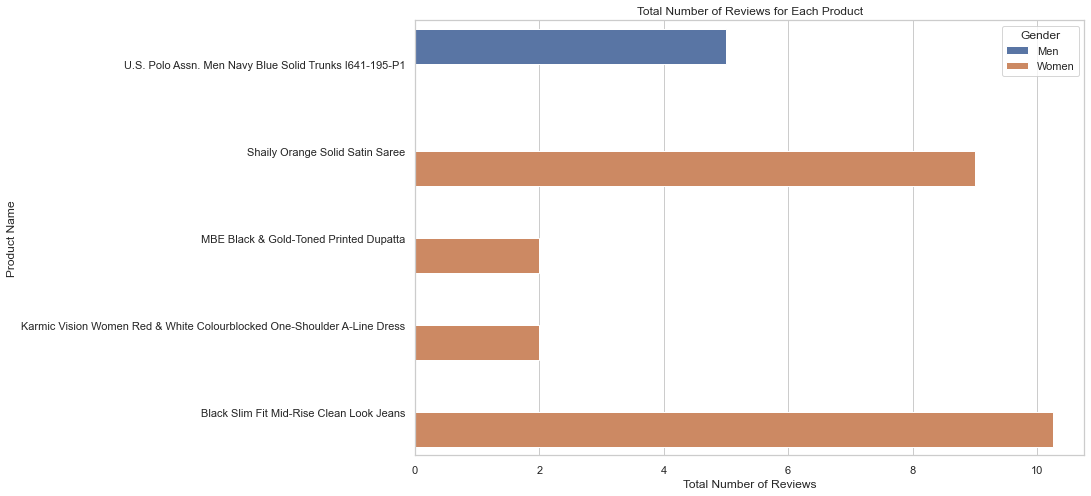

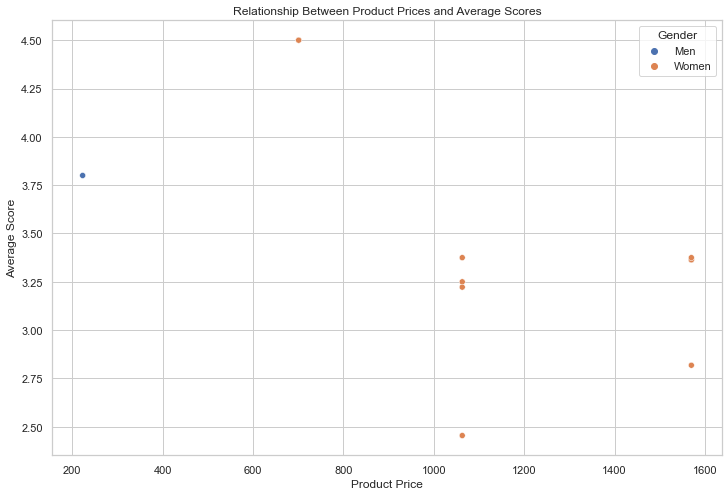

'\nThe x-axis represents the product prices.\nThe y-axis represents the average scores.\nDifferent colors are used to differentiate between products for different genders\n'

In [31]:
# Create a bar chart for the total number of reviews for each product
sns.set(style="whitegrid") # Sets the style of seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='total_number_reviews', y='ProductName', data=augmented_data, hue='Gender', ci=None, orient='h')
# The below sets labels and title
plt.xlabel('Total Number of Reviews')
plt.ylabel('Product Name')
plt.title('Total Number of Reviews for Each Product')
plt.show() # Show the plot
'''
The x-axis represents the total number of reviews.
The y-axis represents the product names.
The hue parameter is used to differentiate between products for different genders
'''

# Create a scatter plot for the relationship between product prices and average scores

sns.set(style="whitegrid") # Sets the style of seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y='Av_Score', data=augmented_data, hue='Gender')
# Set labels and title
plt.xlabel('Product Price')
plt.ylabel('Average Score')
plt.title('Relationship Between Product Prices and Average Scores')
plt.show() # Show the plot

'''
The x-axis represents the product prices.
The y-axis represents the average scores.
Different colors are used to differentiate between products for different genders
'''


### Recommendation

 Based on average product reviews and analysis of the top 10 products, here are possible recommendations for JCPenny:

-__Quality Improvement for Low-Rated Products__:

* Identify products with consistently low average review ratings. A low average rating can be caused by a variety of reasons, including poor product quality, functionality issues, inadequate customer support, and unmet expectations. This can be improved by improving the manufacturing process, materials used or product design. Continuous quality control ensures that our products meet or exceed customer expectations.

-__Promote highly rated products__:

* Highlight and promote products with a high review average.
* Use positive customer reviews in marketing materials and product descriptions to build trust and attract more customers.

-__Adjust marketing strategy__:

* Adjust  marketing strategy based on the 10 most viewed products.
* Also including these products in the marketing campaigns and promotions.

-__Customer-centric approach__:

* Prioritize products that receive high levels of customer engagement and positive feedback.
* Align product development strategies with customer needs and wants.



